# Statistical Analysis on factors influencing Life Expectancy

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

###  Read Dataset

In [3]:
df= pd.read_csv("LifeExpectancy.csv")

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


### Dataset description

This dataset contains 2 columns containing textual information.

Name: a country's name
Status: a country's economic class (Developed or Developing stat
us).
The dataset also contains several numerical columns:

Year: the year that the data was observed
Life expectancy: the number of years that an average person can be expected to live
Adult Mortality: this is the probability that a person aged 15 years old will die before they reach the age of 60 (in a population per 1000 people)
Infant deaths: the number of infant deaths (in a population per 1000 people)
Alcohol: pure alcohol consumption per capita of persons aged over 
percentage expenditure: the percentage of a country's GDP per capita expended on healthcare
Hepatitis B: the percentage of Hepatitis B immunization among children aged 1 year old
Measles: the number of Measles cases reported (in a population per 1000 people)
BMI: the average body mass index value of the country's population
under-five deaths: the number of deaths (in a population per 1000 people) of children under 5 years of age
Polio: the percentage of Polio immunization among children aged 1 year old
Total expenditure: the percentage of total government expenditure allocated to general healthcare expenditure.
Diphtheria: the percentage of Diphtheria, Tetanus, Toxoid, Prtussis (DTP3) immunization among children aged 1 year old
HIV/AIDS: the number of HIV/AIDS deaths (per 1000 live births) of children under 4 years
GDP: the Gross Domestic Product value per capita calculated in USD
Population: the country's population
thinness 1-19 years: the percentage thinness of children aged between 1 and 19 years
thinness 5-9 years: the percentage thinness of children aged between 5 and 9 years
Income composition of resources: the Human Development Index value (0-1) in reference to a country's configuration of resources
Schooling: the mean number of years of schooling of age.15 in Litres

### Check the Data

In [6]:
#shape
df.shape

(2938, 22)

In [7]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
df.columns=df.columns.str.replace(" ","")

In [10]:
# Numerical columns
num_cols = df.select_dtypes(include='number').columns
print(num_cols)

Index(['Year', 'Lifeexpectancy', 'AdultMortality', 'infantdeaths', 'Alcohol',
       'percentageexpenditure', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')


In [11]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols )

Index(['Country', 'Status'], dtype='object')


#### Out of 22 columns, 2 are categorical and 20 are numerical

In [12]:
# finding missing values
df.isnull().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64

In [13]:
# Percentage of missing values in each column
df.isnull().sum()/df.shape[0]*100

Country                          0.000000
Year                             0.000000
Status                           0.000000
Lifeexpectancy                   0.340368
AdultMortality                   0.340368
infantdeaths                     0.000000
Alcohol                          6.603131
percentageexpenditure            0.000000
HepatitisB                      18.822328
Measles                          0.000000
BMI                              1.157250
under-fivedeaths                 0.000000
Polio                            0.646698
Totalexpenditure                 7.692308
Diphtheria                       0.646698
HIV/AIDS                         0.000000
GDP                             15.248468
Population                      22.191967
thinness1-19years                1.157250
thinness5-9years                 1.157250
Incomecompositionofresources     5.684139
Schooling                        5.547992
dtype: float64

#### If percentage of missing values is greater than 50%, we can drop that columns. 

In [14]:
# finding duplicates
df.duplicated().sum()

0

#### There are no duplicate values

### Exploratory Data Analysis(EDA)

In [15]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Lifeexpectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
AdultMortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infantdeaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentageexpenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
HepatitisB,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-fivedeaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [16]:
df.describe(include="object").T

,count,unique,top,freq
Country,2938,193,Afghanistan,16
Status,2938,2,Developing,2426


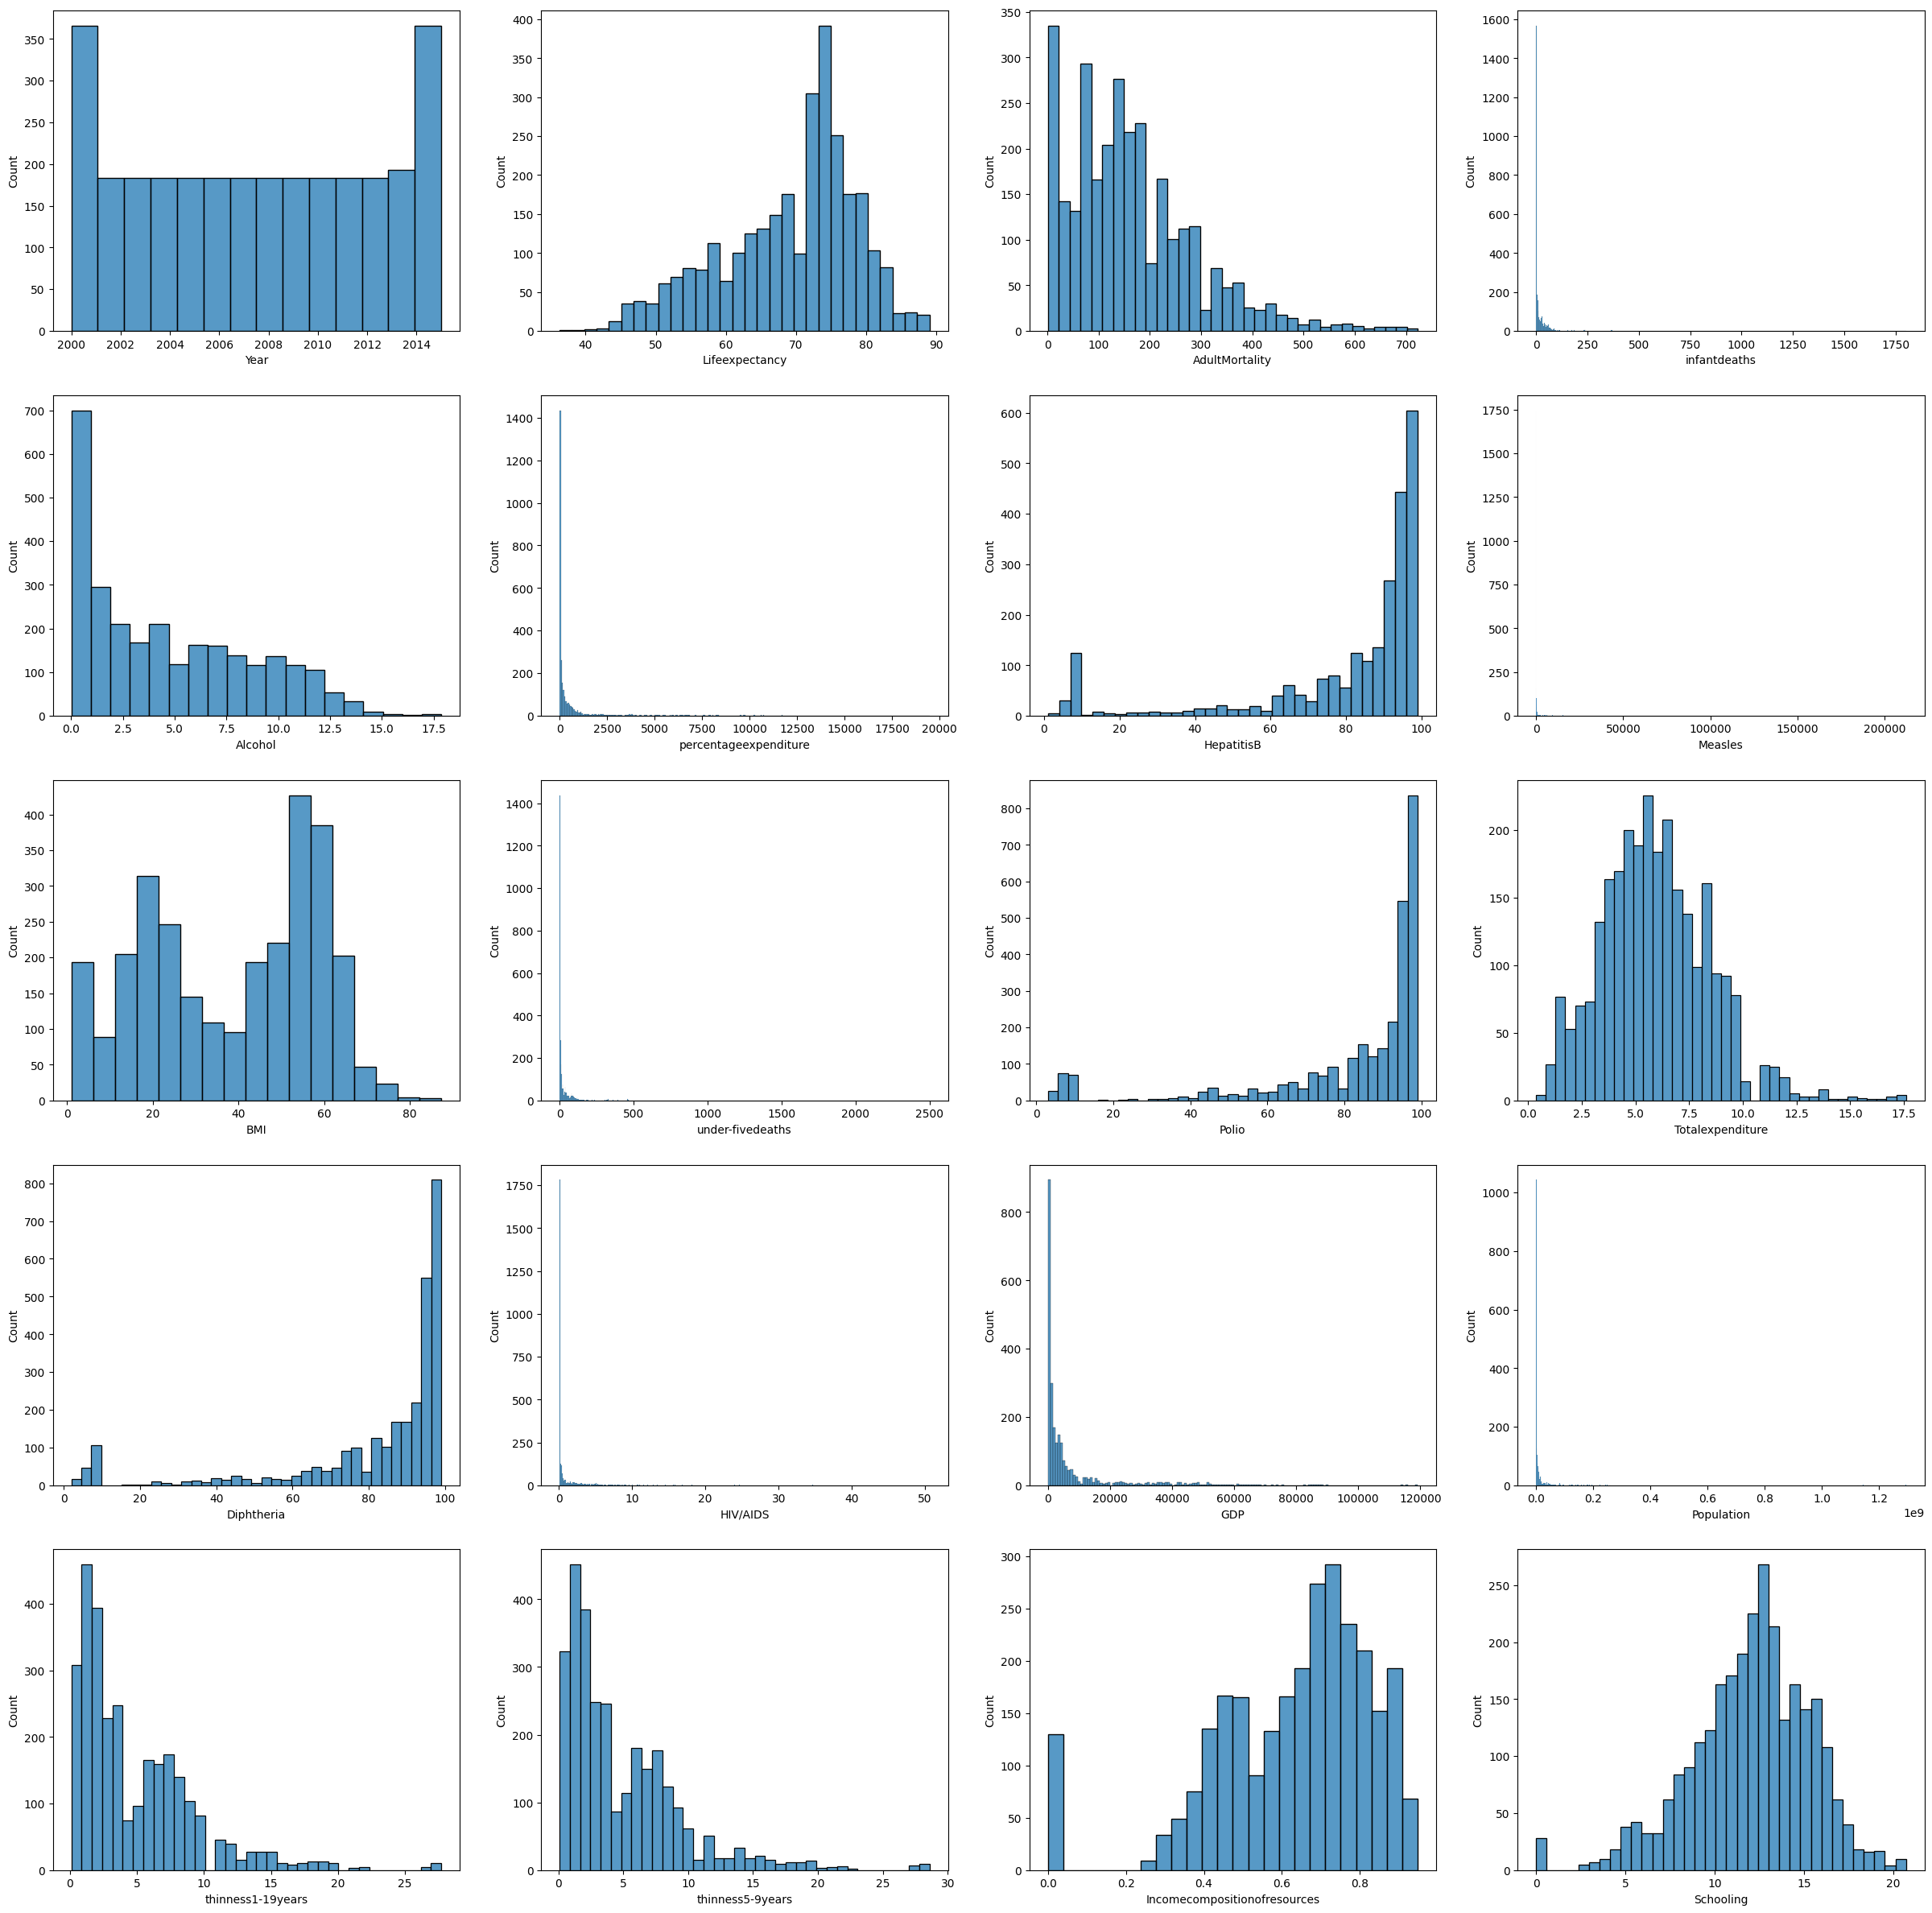

In [17]:
# histogram to understand the distribution

fig = plt.figure(figsize=(30,30))
counter = 0

for col in num_cols:
    fig.add_subplot(5,4,counter+1)
    sns.histplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

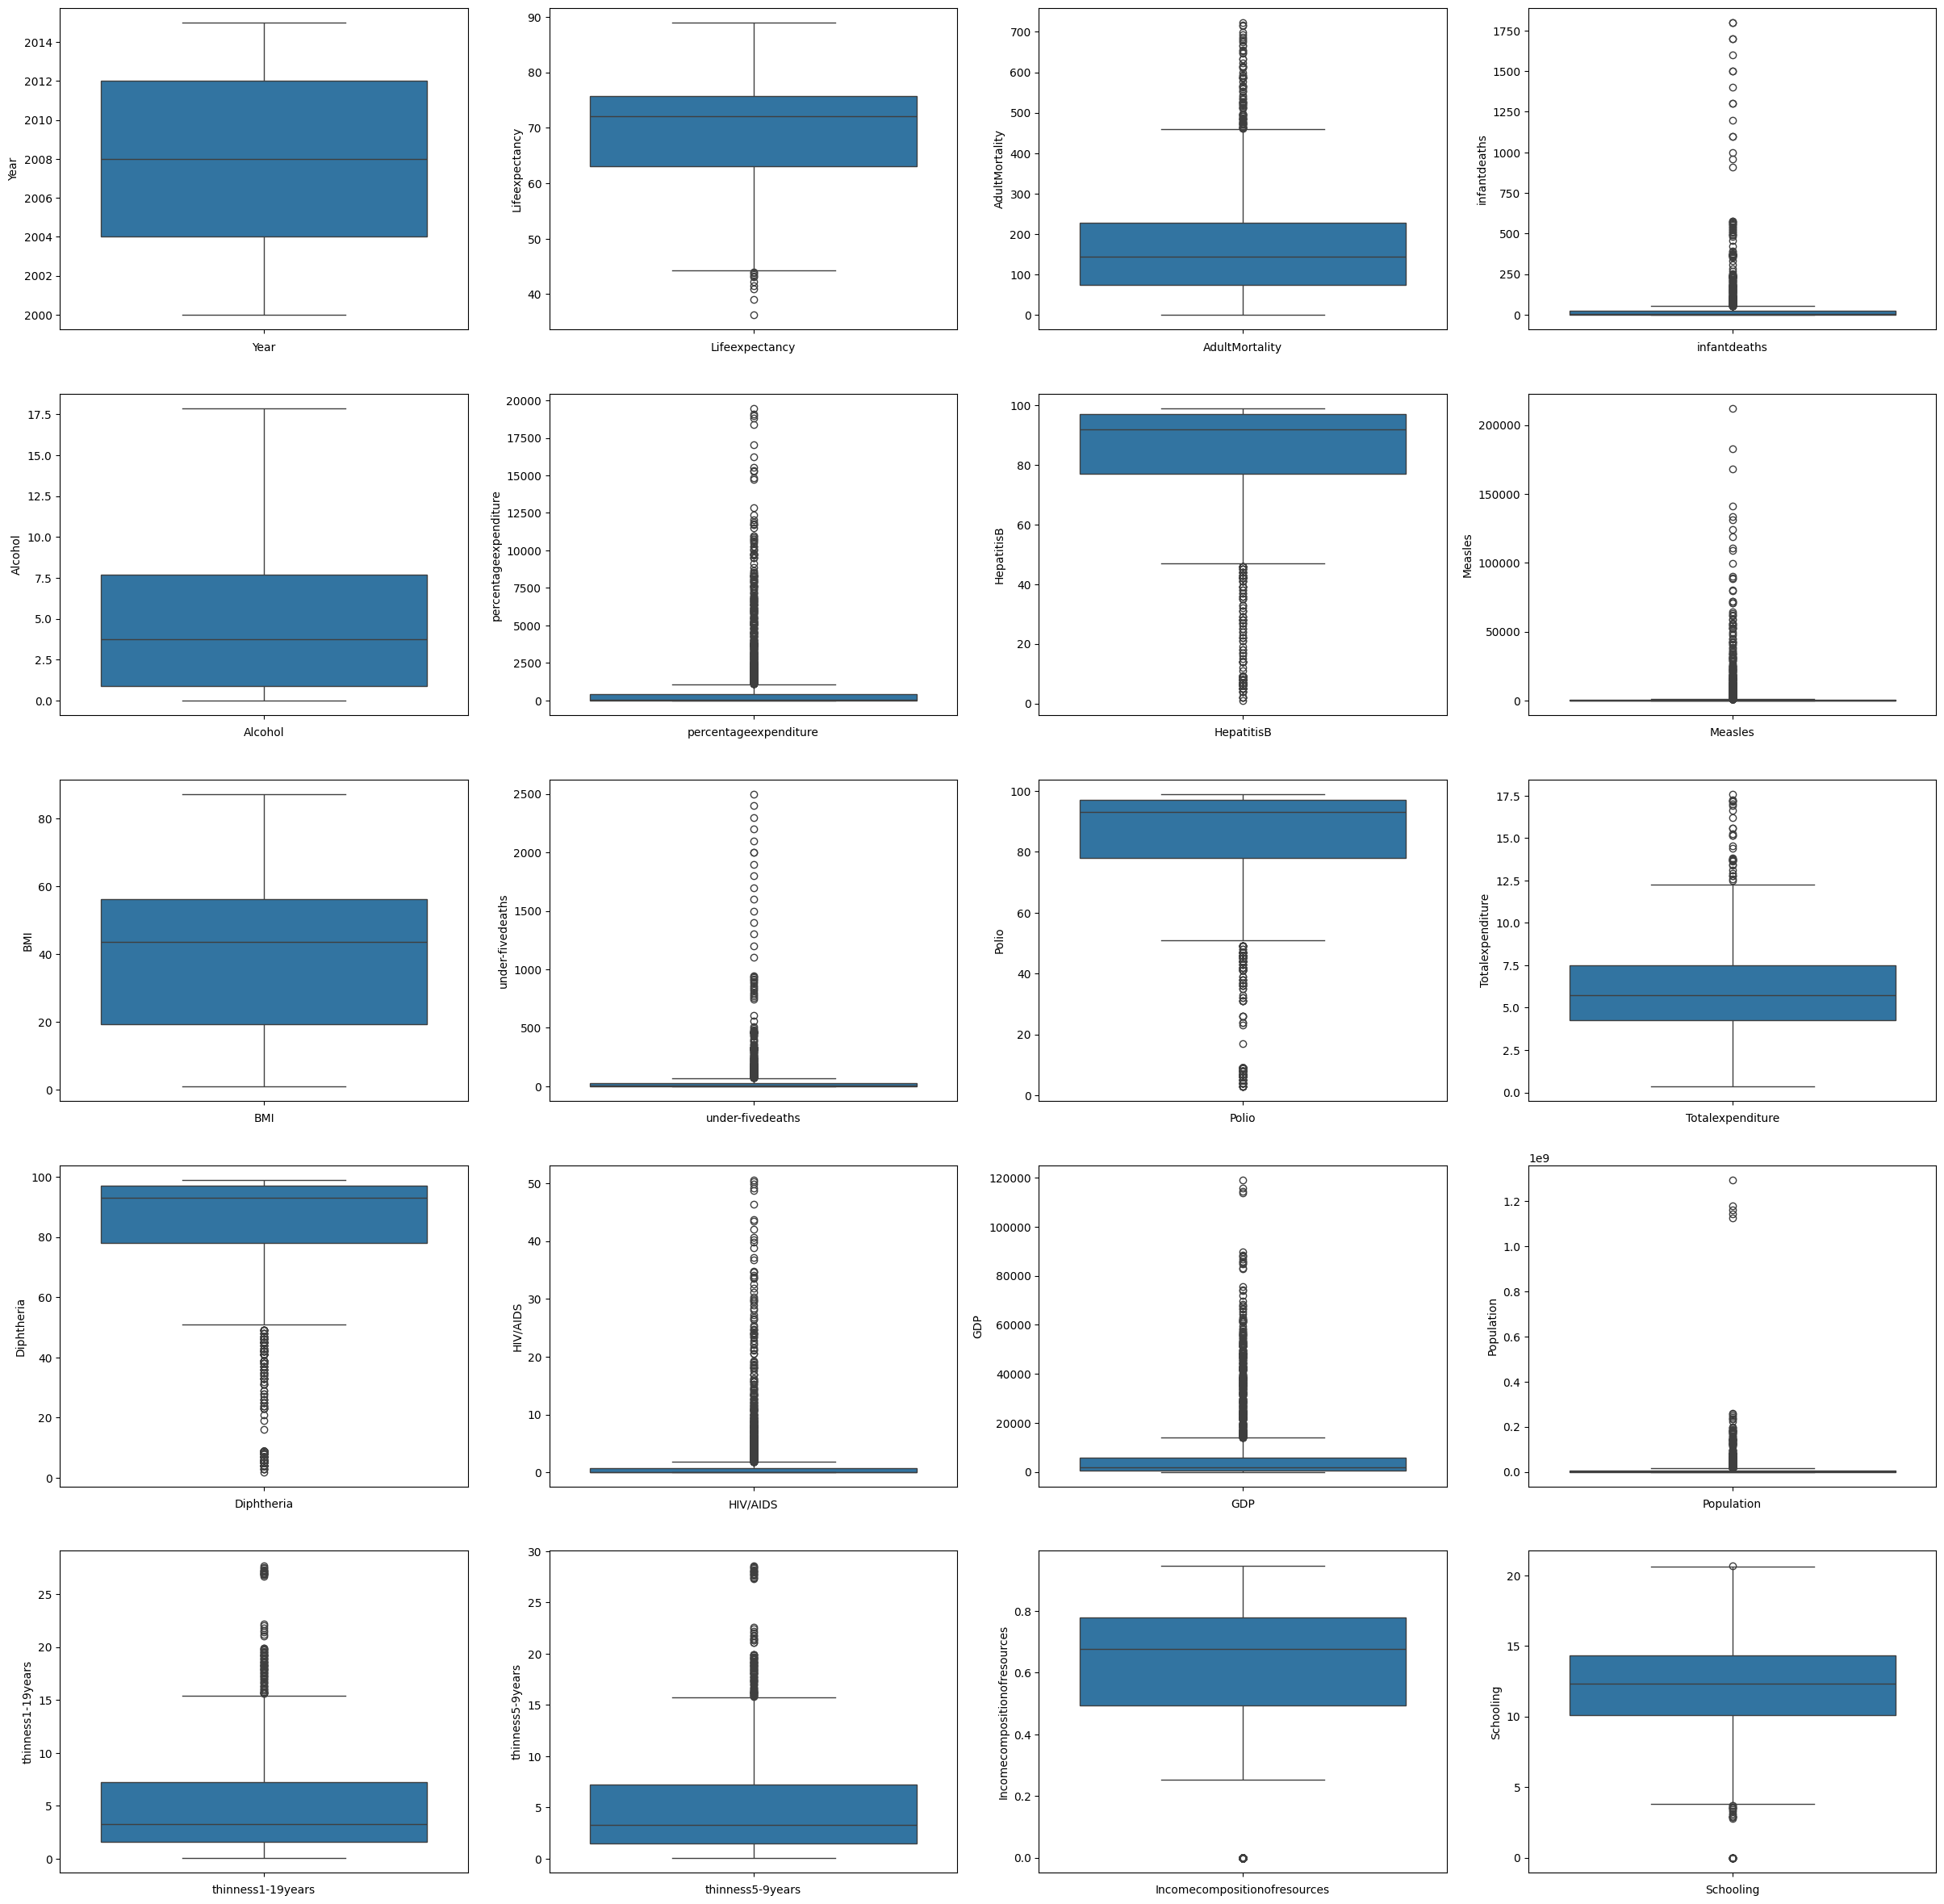

In [18]:
#box plot to identify outliers
fig = plt.figure(figsize=(30,30))
counter = 0

for col in num_cols:
    fig.add_subplot(5,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

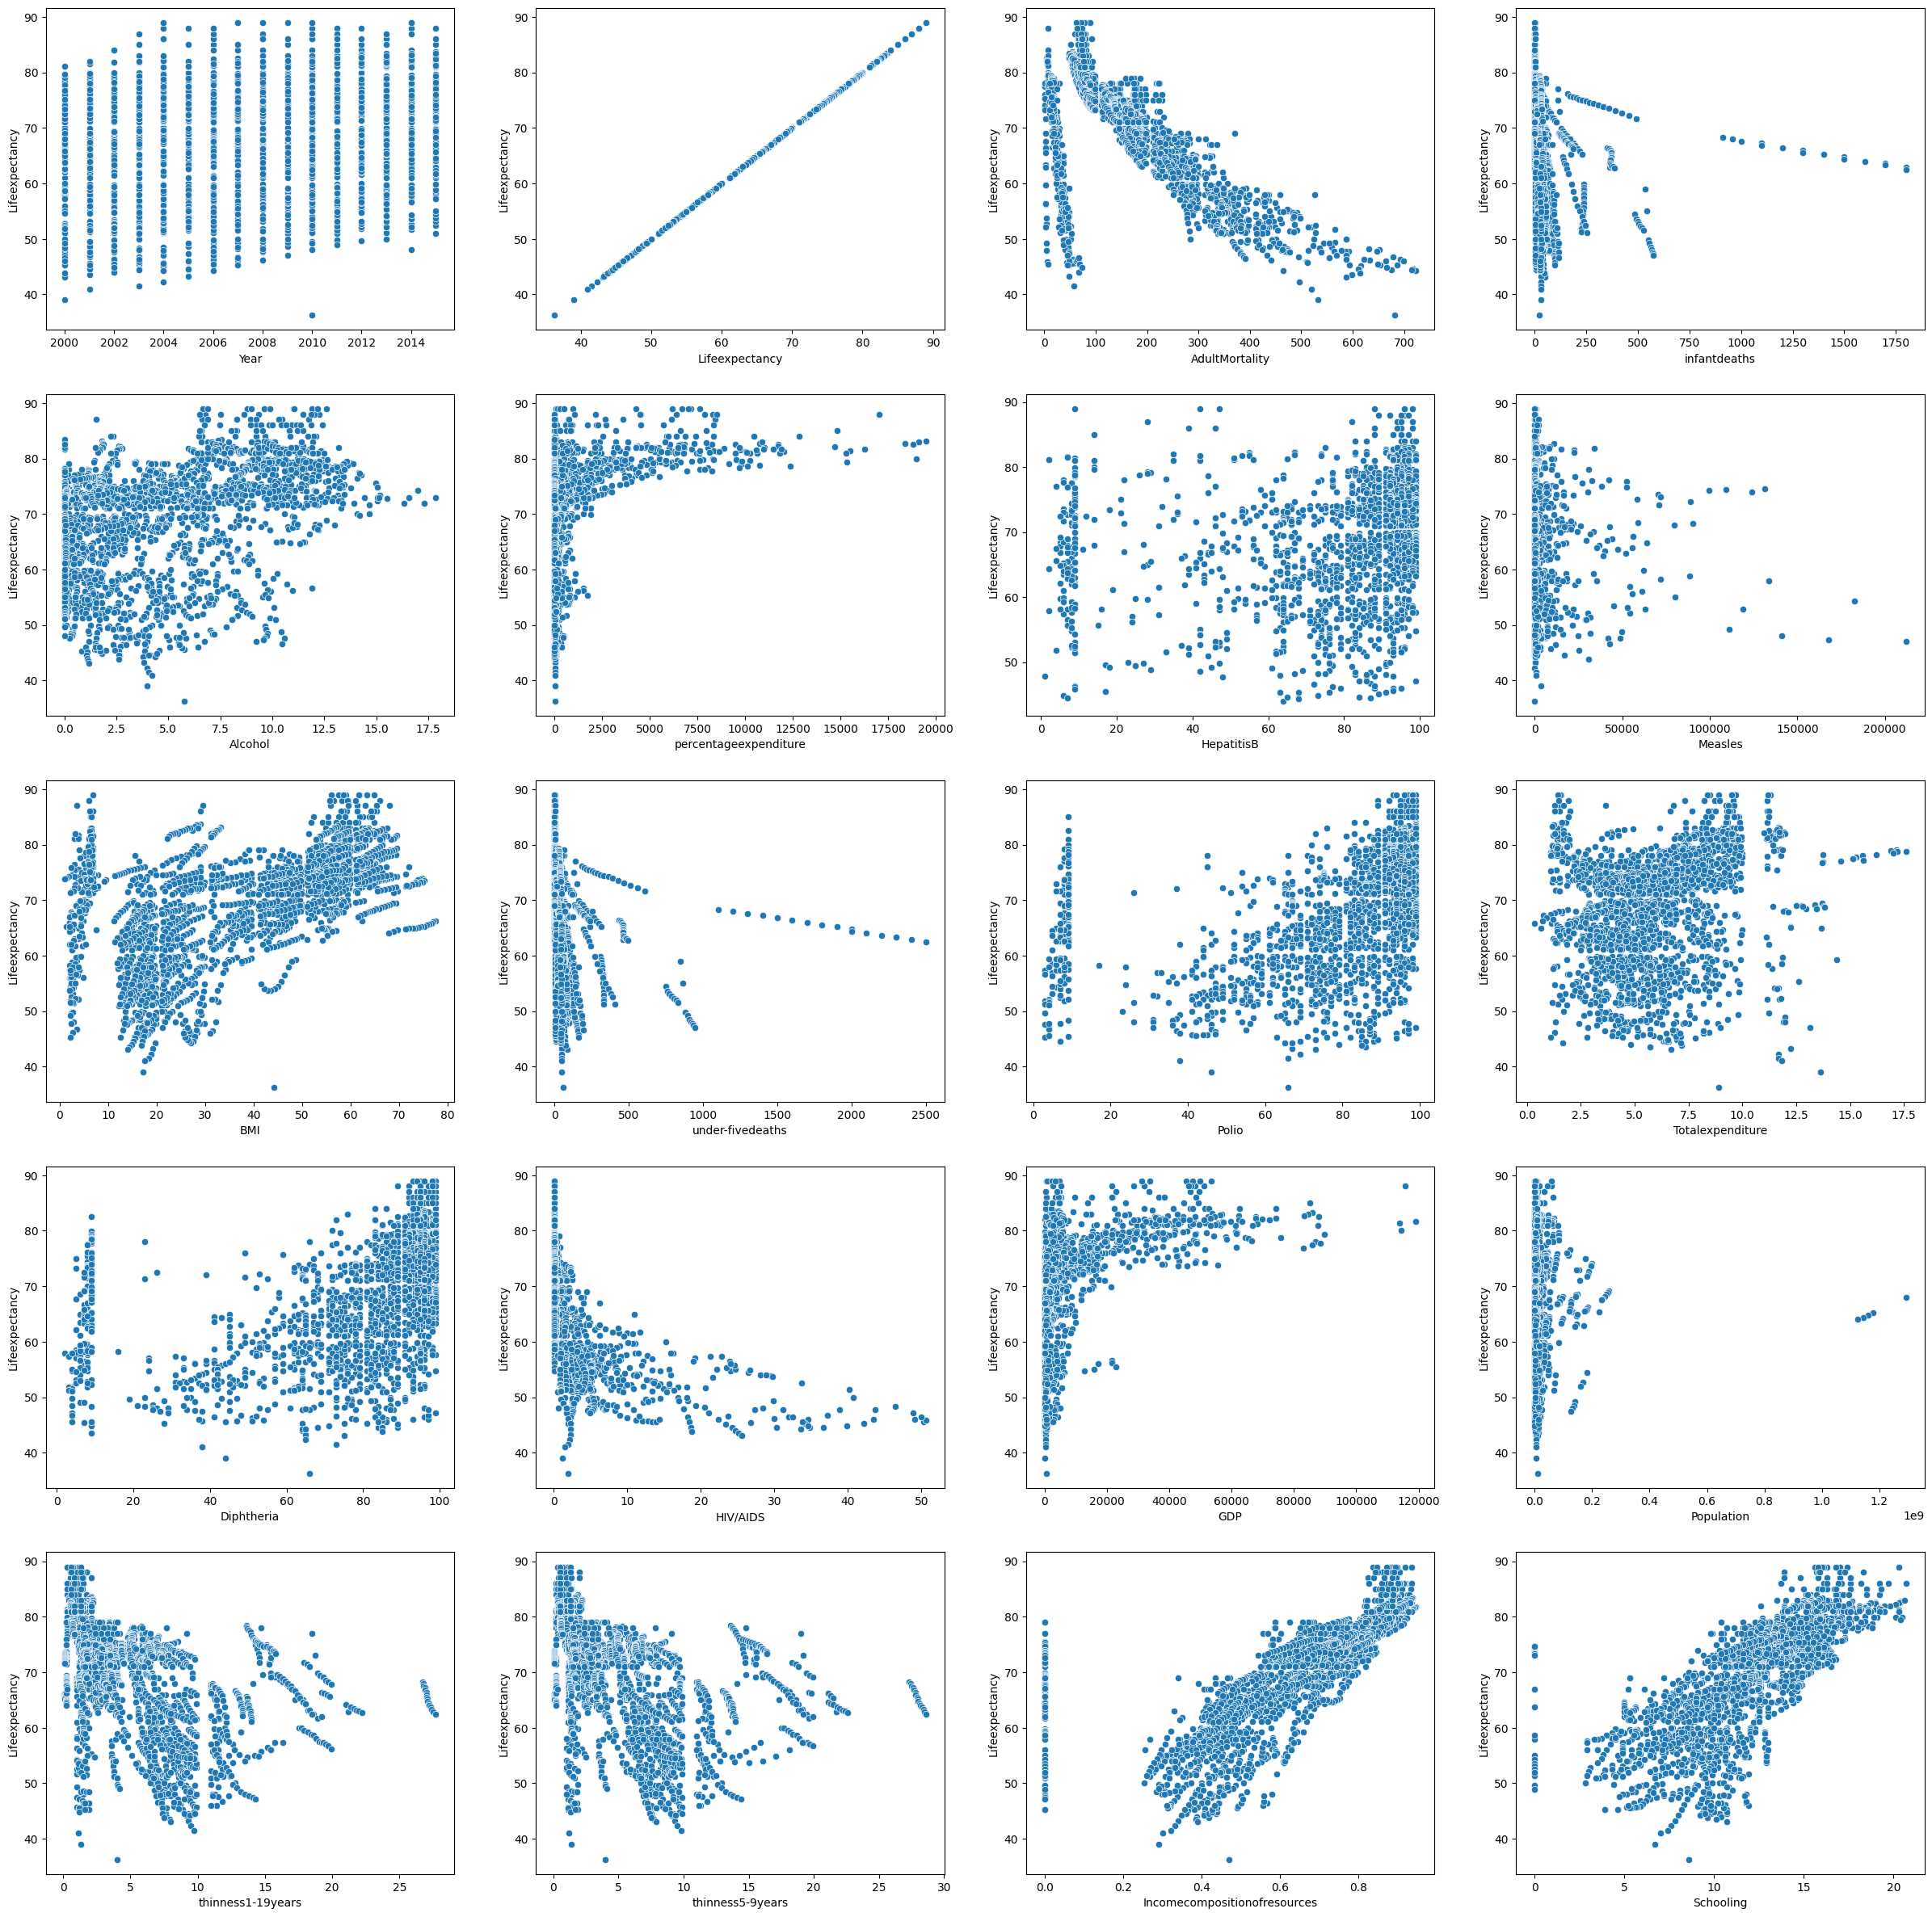

In [19]:
# scatter plot to identify the relationship between dependent (Life expectancy) and independent features
fig = plt.figure(figsize=(30,30))
counter = 0

for col in num_cols:
    fig.add_subplot(5,4,counter+1)
    sns.scatterplot(data=df,x=col,y='Lifeexpectancy')
    plt.xlabel(col)
    counter = counter + 1

<Axes: >

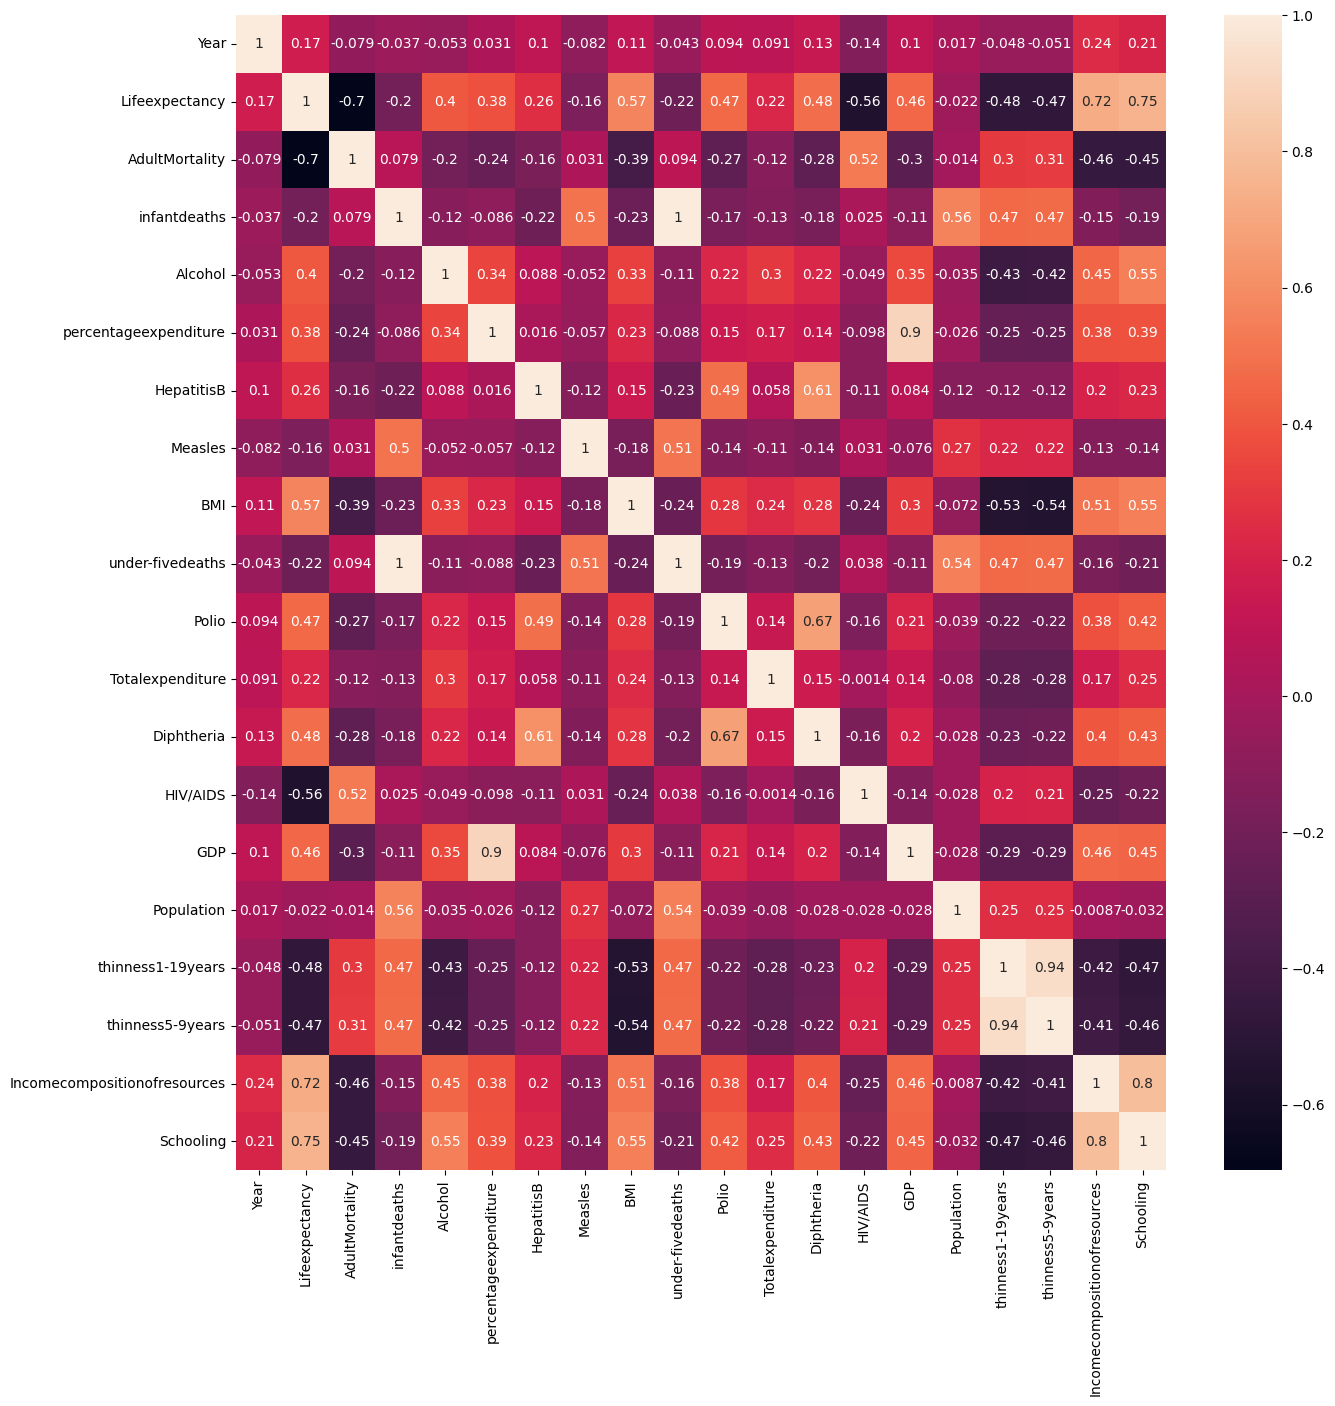

In [20]:
# correlation with heatmap to interpret the relation and multicolliniarity
plt.figure(figsize=(15,15))
sns.heatmap(df[num_cols].corr(),annot=True)

#### highly correlated columns
infantdeaths and under-fivedeaths 
percentageexpenditure and GDP
Polio and Diphtheria
thinness1-19years and thinness5-9years
Incomecompositionofresources and Schooling

<Axes: xlabel='Incomecompositionofresources', ylabel='Schooling'>

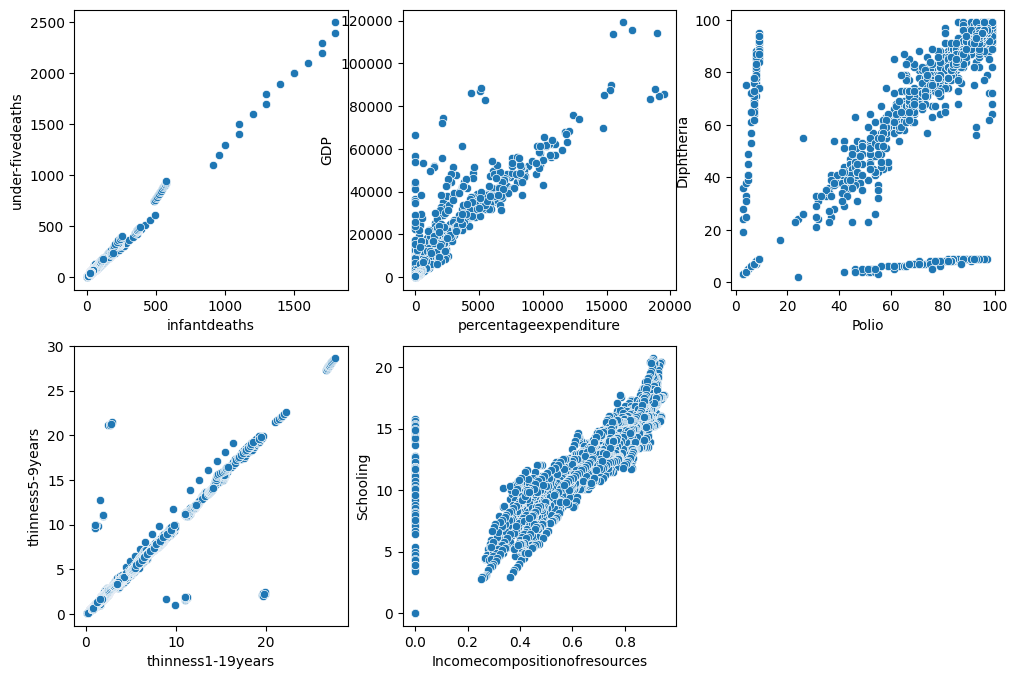

In [21]:
plt.figure(figsize=(12, 8))
plt.subplot(2,3,1)
sns.scatterplot(data=df,x='infantdeaths',y='under-fivedeaths')

plt.subplot(2,3,2)
sns.scatterplot(data=df,x='percentageexpenditure',y='GDP')

plt.subplot(2,3,3)
sns.scatterplot(data=df,x='Polio',y='Diphtheria')

plt.subplot(2,3,4)
sns.scatterplot(data=df,x='thinness1-19years',y='thinness5-9years')

plt.subplot(2,3,5)
sns.scatterplot(data=df,x='Incomecompositionofresources',y='Schooling')

#### We can drop the columns infantdeaths, percentageexpenditure, Polio, thinness1-19years, Incomecompositionofresources

### Data Preprocessing

In [22]:
df1=df.copy()

In [23]:
df1.drop(['infantdeaths','percentageexpenditure','Polio','thinness1-19years','Incomecompositionofresources'],axis=1,inplace=True)

In [24]:
df1

,Country,Year,Status,Lifeexpectancy,AdultMortality,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness5-9years,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,0.01,65.0,1154,19.1,83,8.16,65.0,0.1,584.259210,33736494.0,17.3,10.1
1,Afghanistan,2014,Developing,59.9,271.0,0.01,62.0,492,18.6,86,8.18,62.0,0.1,612.696514,327582.0,17.5,10.0
2,Afghanistan,2013,Developing,59.9,268.0,0.01,64.0,430,18.1,89,8.13,64.0,0.1,631.744976,31731688.0,17.7,9.9
3,Afghanistan,2012,Developing,59.5,272.0,0.01,67.0,2787,17.6,93,8.52,67.0,0.1,669.959000,3696958.0,18.0,9.8
4,Afghanistan,2011,Developing,59.2,275.0,0.01,68.0,3013,17.2,97,7.87,68.0,0.1,63.537231,2978599.0,18.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,4.36,68.0,31,27.1,42,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,4.06,7.0,998,26.7,41,6.52,68.0,36.7,453.351155,12633897.0,9.9,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,4.43,73.0,304,26.3,40,6.53,71.0,39.8,57.348340,125525.0,1.3,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,1.72,76.0,529,25.9,39,6.16,75.0,42.1,548.587312,12366165.0,1.7,9.8


### Missing value treatment
Can use mean, median , mode or KNNimputer

KNNImputer is a method used for imputing missing values by using the k-nearest neighbors approach.

In [25]:
df1.isnull().sum()

Country               0
Year                  0
Status                0
Lifeexpectancy       10
AdultMortality       10
Alcohol             194
HepatitisB          553
Measles               0
BMI                  34
under-fivedeaths      0
Totalexpenditure    226
Diphtheria           19
HIV/AIDS              0
GDP                 448
Population          652
thinness5-9years     34
Schooling           163
dtype: int64

#### Lifeexpectancy is the target variable. So no need of missing value treatment and outlier treatment as it may affect the model.

In [26]:
# removing rows with nullvalues in target column
df2=df1.copy()

In [27]:
df2.dropna(subset=['Lifeexpectancy'],inplace=True)

In [28]:
df2.isnull().sum()

Country               0
Year                  0
Status                0
Lifeexpectancy        0
AdultMortality        0
Alcohol             193
HepatitisB          553
Measles               0
BMI                  32
under-fivedeaths      0
Totalexpenditure    226
Diphtheria           19
HIV/AIDS              0
GDP                 443
Population          644
thinness5-9years     32
Schooling           160
dtype: int64

In [29]:
# Filling null values with mean (Alcohol and BMI doesnot contain outliers)
for i in ['Alcohol','BMI']:
    df2[i].fillna(df2[i].mean(),inplace=True)

In [30]:
df2.isnull().sum()

Country               0
Year                  0
Status                0
Lifeexpectancy        0
AdultMortality        0
Alcohol               0
HepatitisB          553
Measles               0
BMI                   0
under-fivedeaths      0
Totalexpenditure    226
Diphtheria           19
HIV/AIDS              0
GDP                 443
Population          644
thinness5-9years     32
Schooling           160
dtype: int64

In [31]:
# use KNNImputer to fill rest of the not null values 

from sklearn.impute import KNNImputer
impute=KNNImputer()

In [32]:
for i in df2.select_dtypes(include="number").columns:
    df2[i]=impute.fit_transform(df2[[i]])

In [33]:
df2.isnull().sum()

Country             0
Year                0
Status              0
Lifeexpectancy      0
AdultMortality      0
Alcohol             0
HepatitisB          0
Measles             0
BMI                 0
under-fivedeaths    0
Totalexpenditure    0
Diphtheria          0
HIV/AIDS            0
GDP                 0
Population          0
thinness5-9years    0
Schooling           0
dtype: int64

### Outlier Treatment

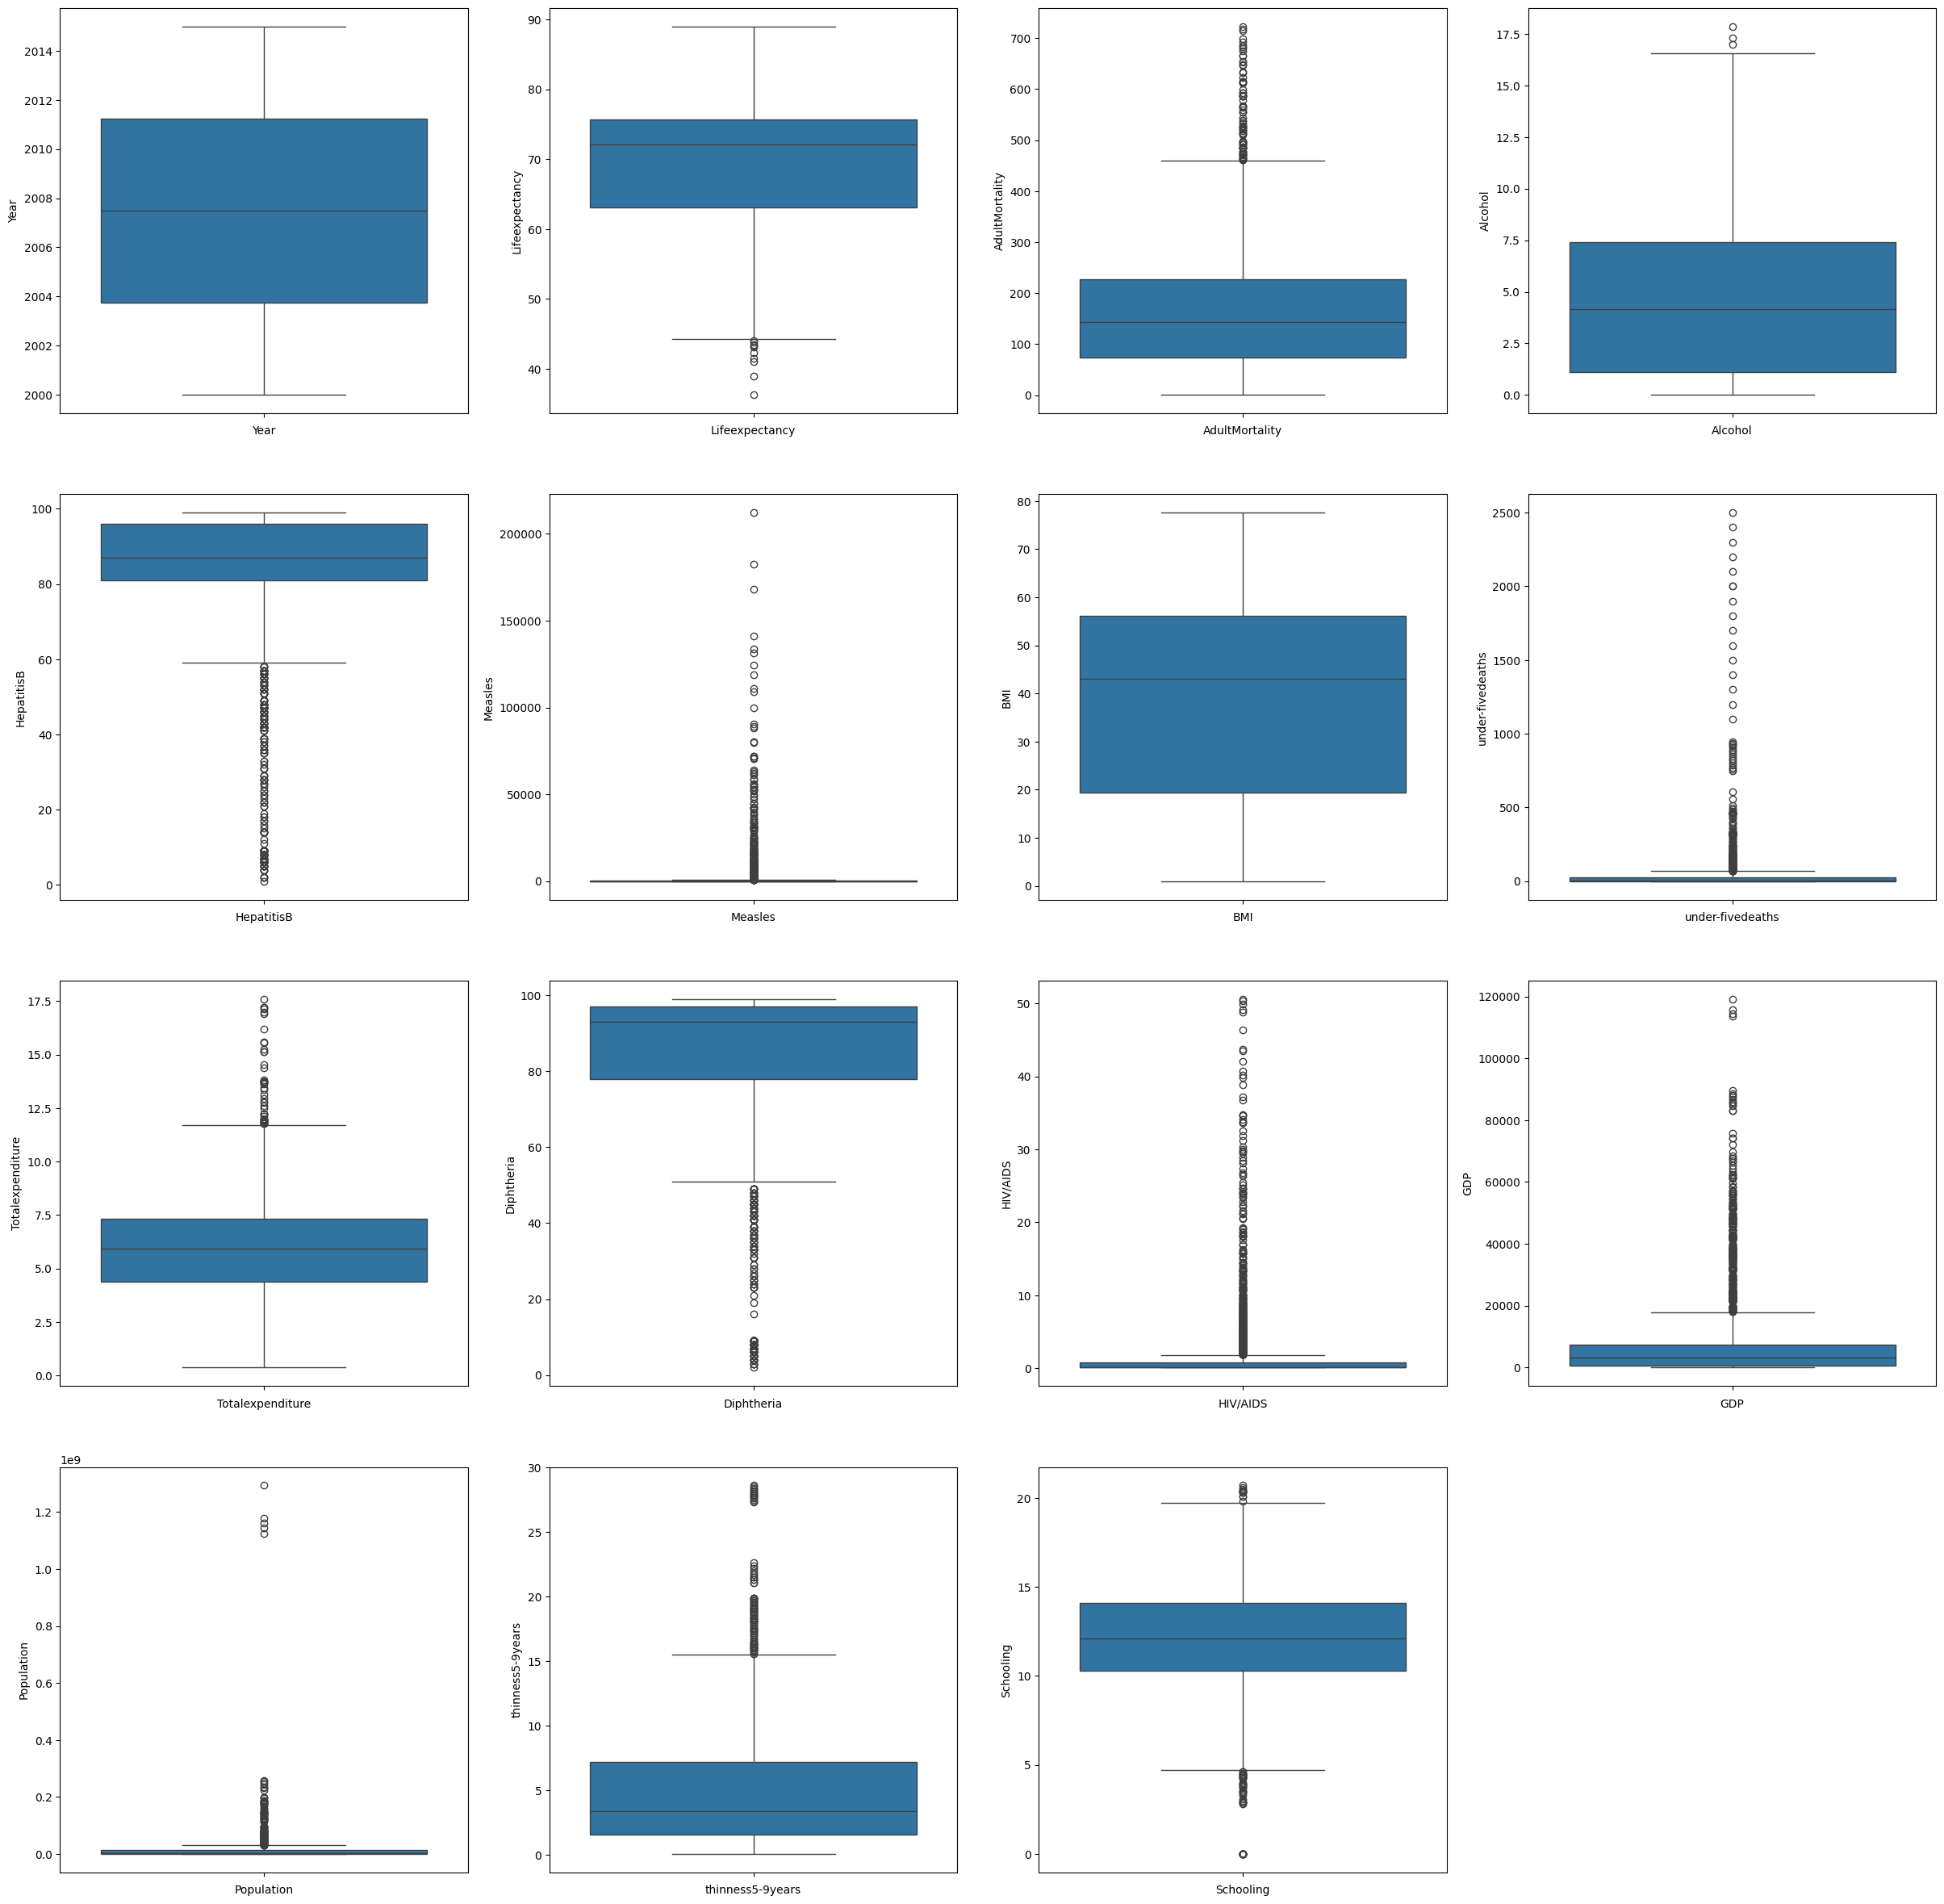

In [34]:
#box plot to identify outliers
fig = plt.figure(figsize=(30,30))
counter = 0

for col in df2.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df2[col])
    plt.xlabel(col)
    counter = counter + 1

In [35]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [36]:
whisker(df2['BMI'])

(-35.650000000000006, 111.15)

In [37]:
for i in df2.select_dtypes(include="number").columns:
    lw,uw=whisker(df2[i])
    df2[i]=np.where(df2[i]<lw,lw,df2[i])
    df2[i]=np.where(df2[i]>uw,uw,df2[i])    

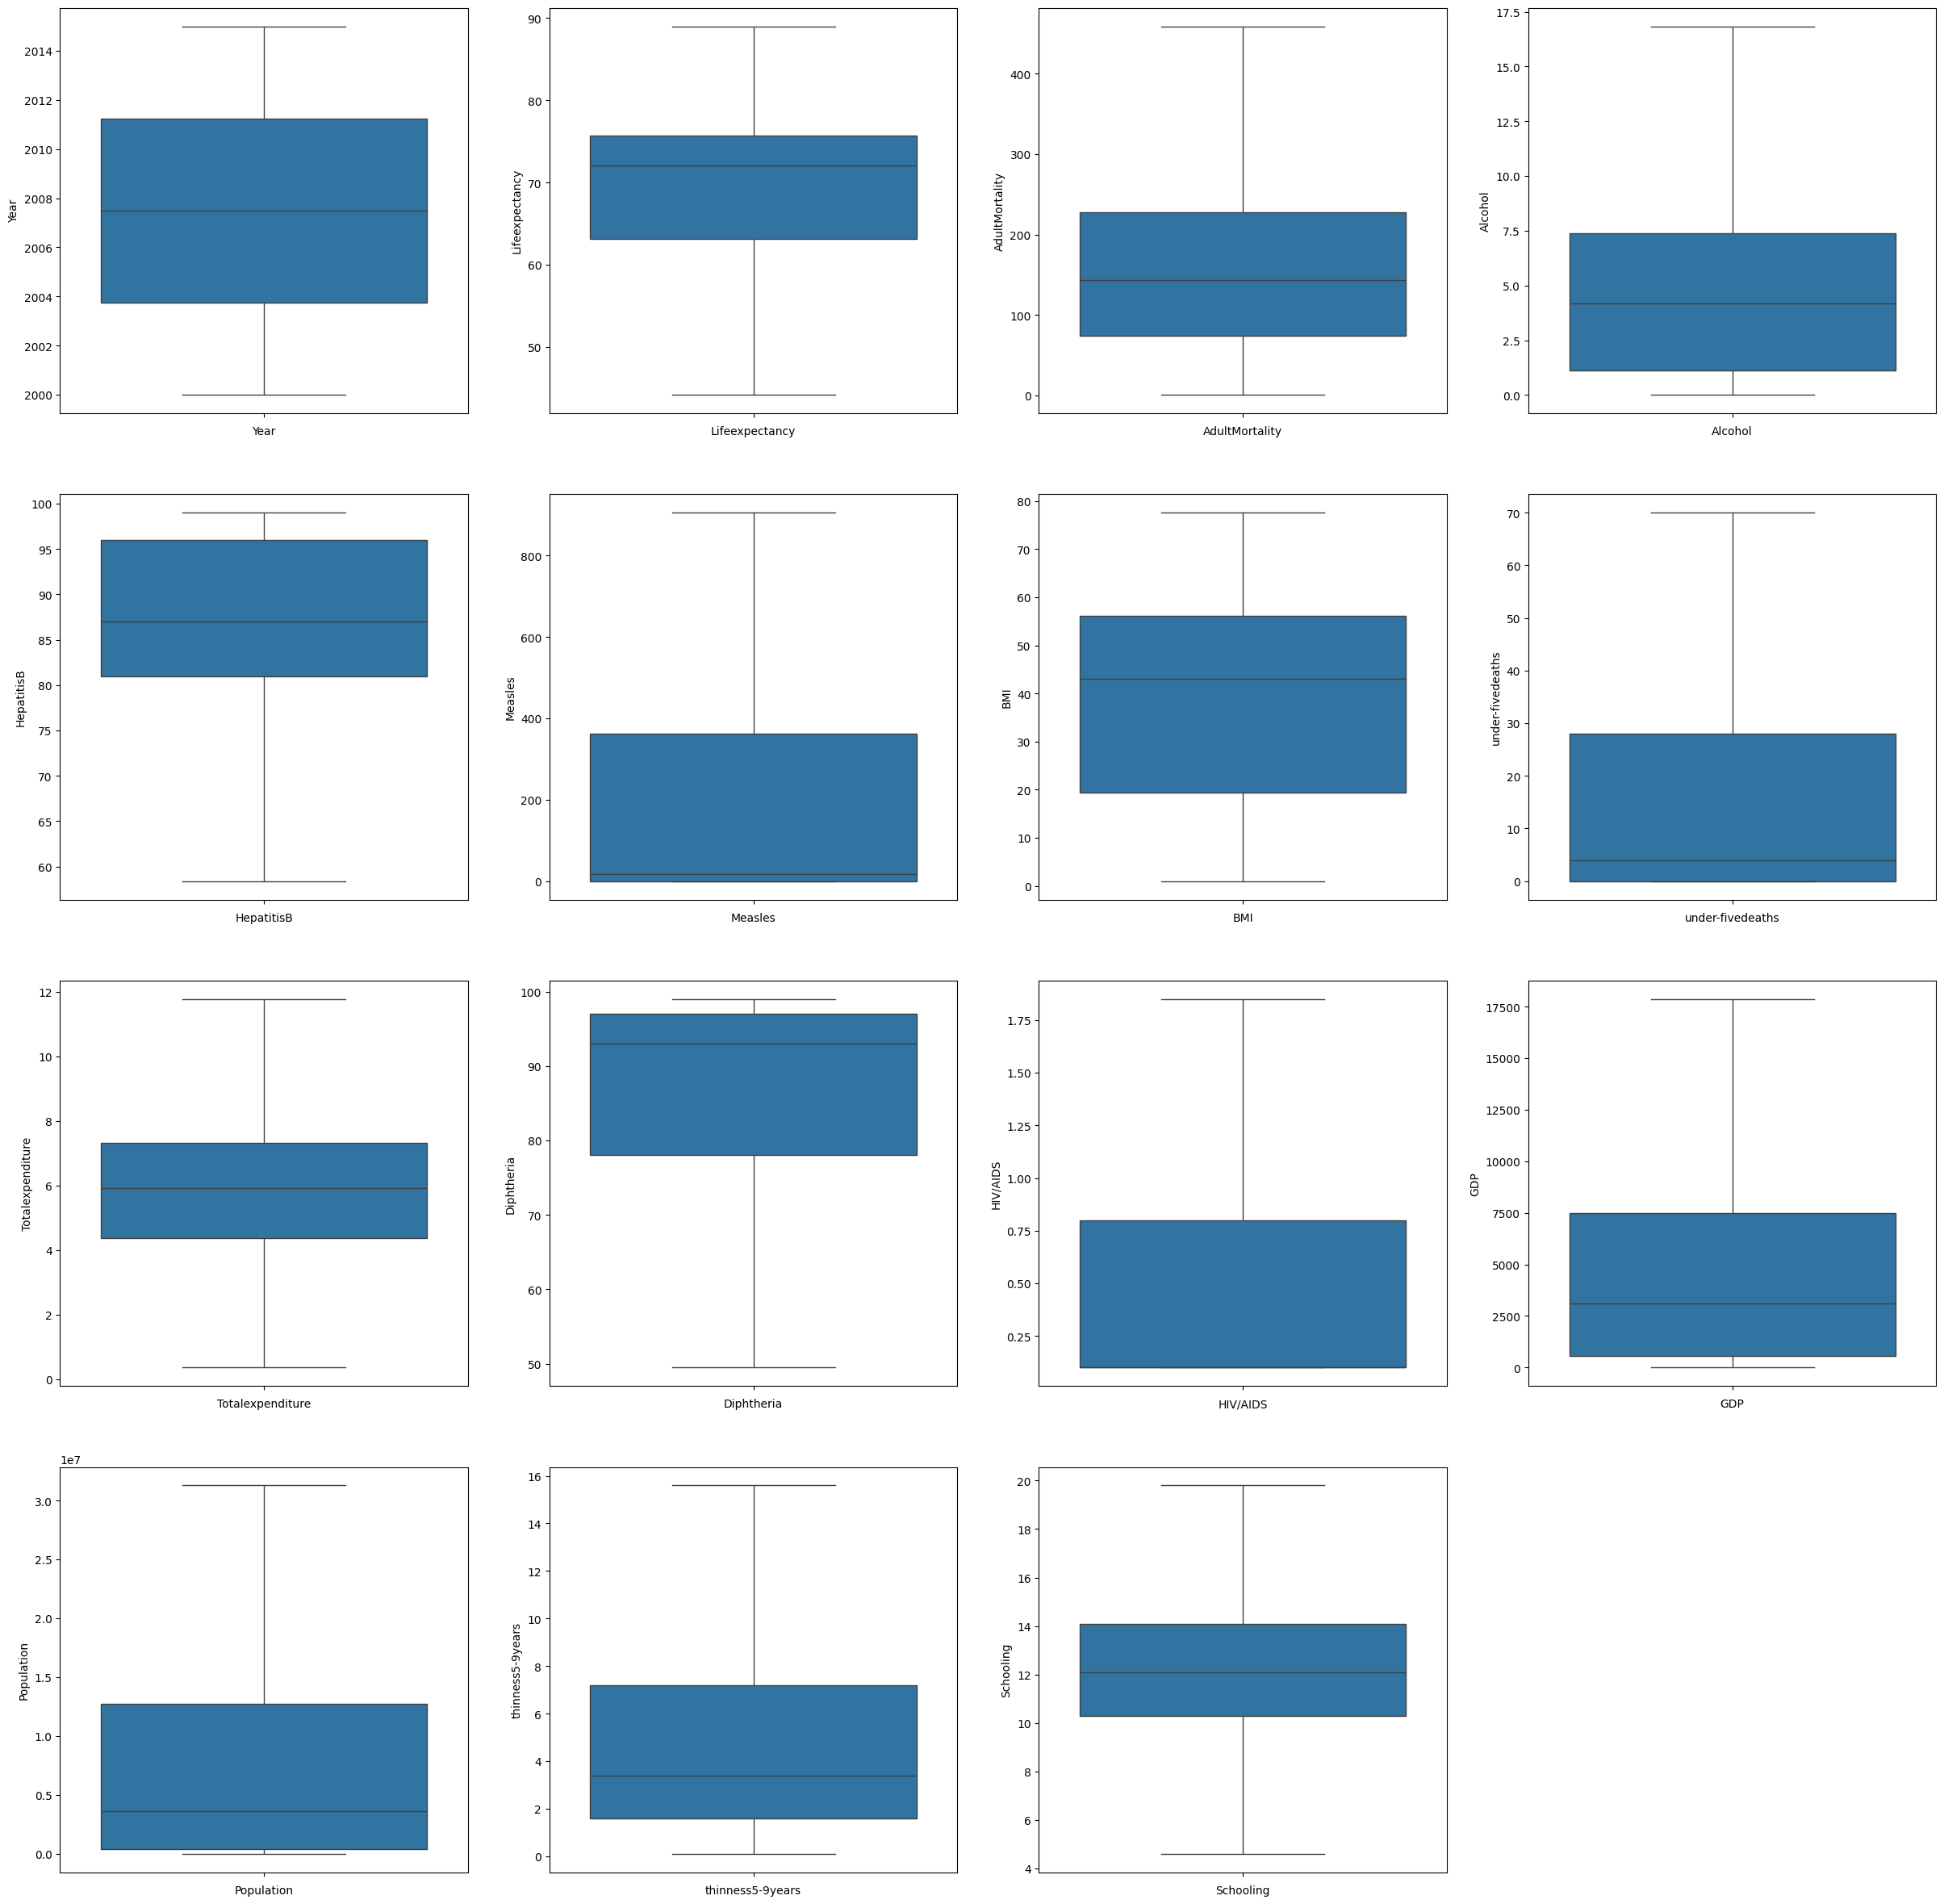

In [38]:
#box plot to identify outliers
fig = plt.figure(figsize=(30,30))
counter = 0

for col in df2.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df2[col])
    plt.xlabel(col)
    counter = counter + 1

In [39]:
# Dropping the columns country and year
df2.drop(['Country','Year'],axis=1,inplace=True)

In [40]:
df2

,Status,Lifeexpectancy,AdultMortality,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness5-9years,Schooling
0,Developing,65.0,263.0,0.01,65.000000,905.625,19.1,70.0,8.16,65.0,0.10,584.259210,3.128417e+07,15.6,10.1
1,Developing,59.9,271.0,0.01,62.000000,492.000,18.6,70.0,8.18,62.0,0.10,612.696514,3.275820e+05,15.6,10.0
2,Developing,59.9,268.0,0.01,64.000000,430.000,18.1,70.0,8.13,64.0,0.10,631.744976,3.128417e+07,15.6,9.9
3,Developing,59.5,272.0,0.01,67.000000,905.625,17.6,70.0,8.52,67.0,0.10,669.959000,3.696958e+06,15.6,9.8
4,Developing,59.2,275.0,0.01,68.000000,905.625,17.2,70.0,7.87,68.0,0.10,63.537231,2.978599e+06,15.6,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Developing,44.3,459.0,4.36,68.000000,31.000,27.1,42.0,7.13,65.0,1.85,454.366654,1.277751e+07,9.4,9.2
2934,Developing,44.5,459.0,4.06,58.402105,905.625,26.7,41.0,6.52,68.0,1.85,453.351155,1.263390e+07,9.9,9.5
2935,Developing,44.8,73.0,4.43,73.000000,304.000,26.3,40.0,6.53,71.0,1.85,57.348340,1.255250e+05,1.3,10.0
2936,Developing,45.3,459.0,1.72,76.000000,529.000,25.9,39.0,6.16,75.0,1.85,548.587312,1.236616e+07,1.7,9.8


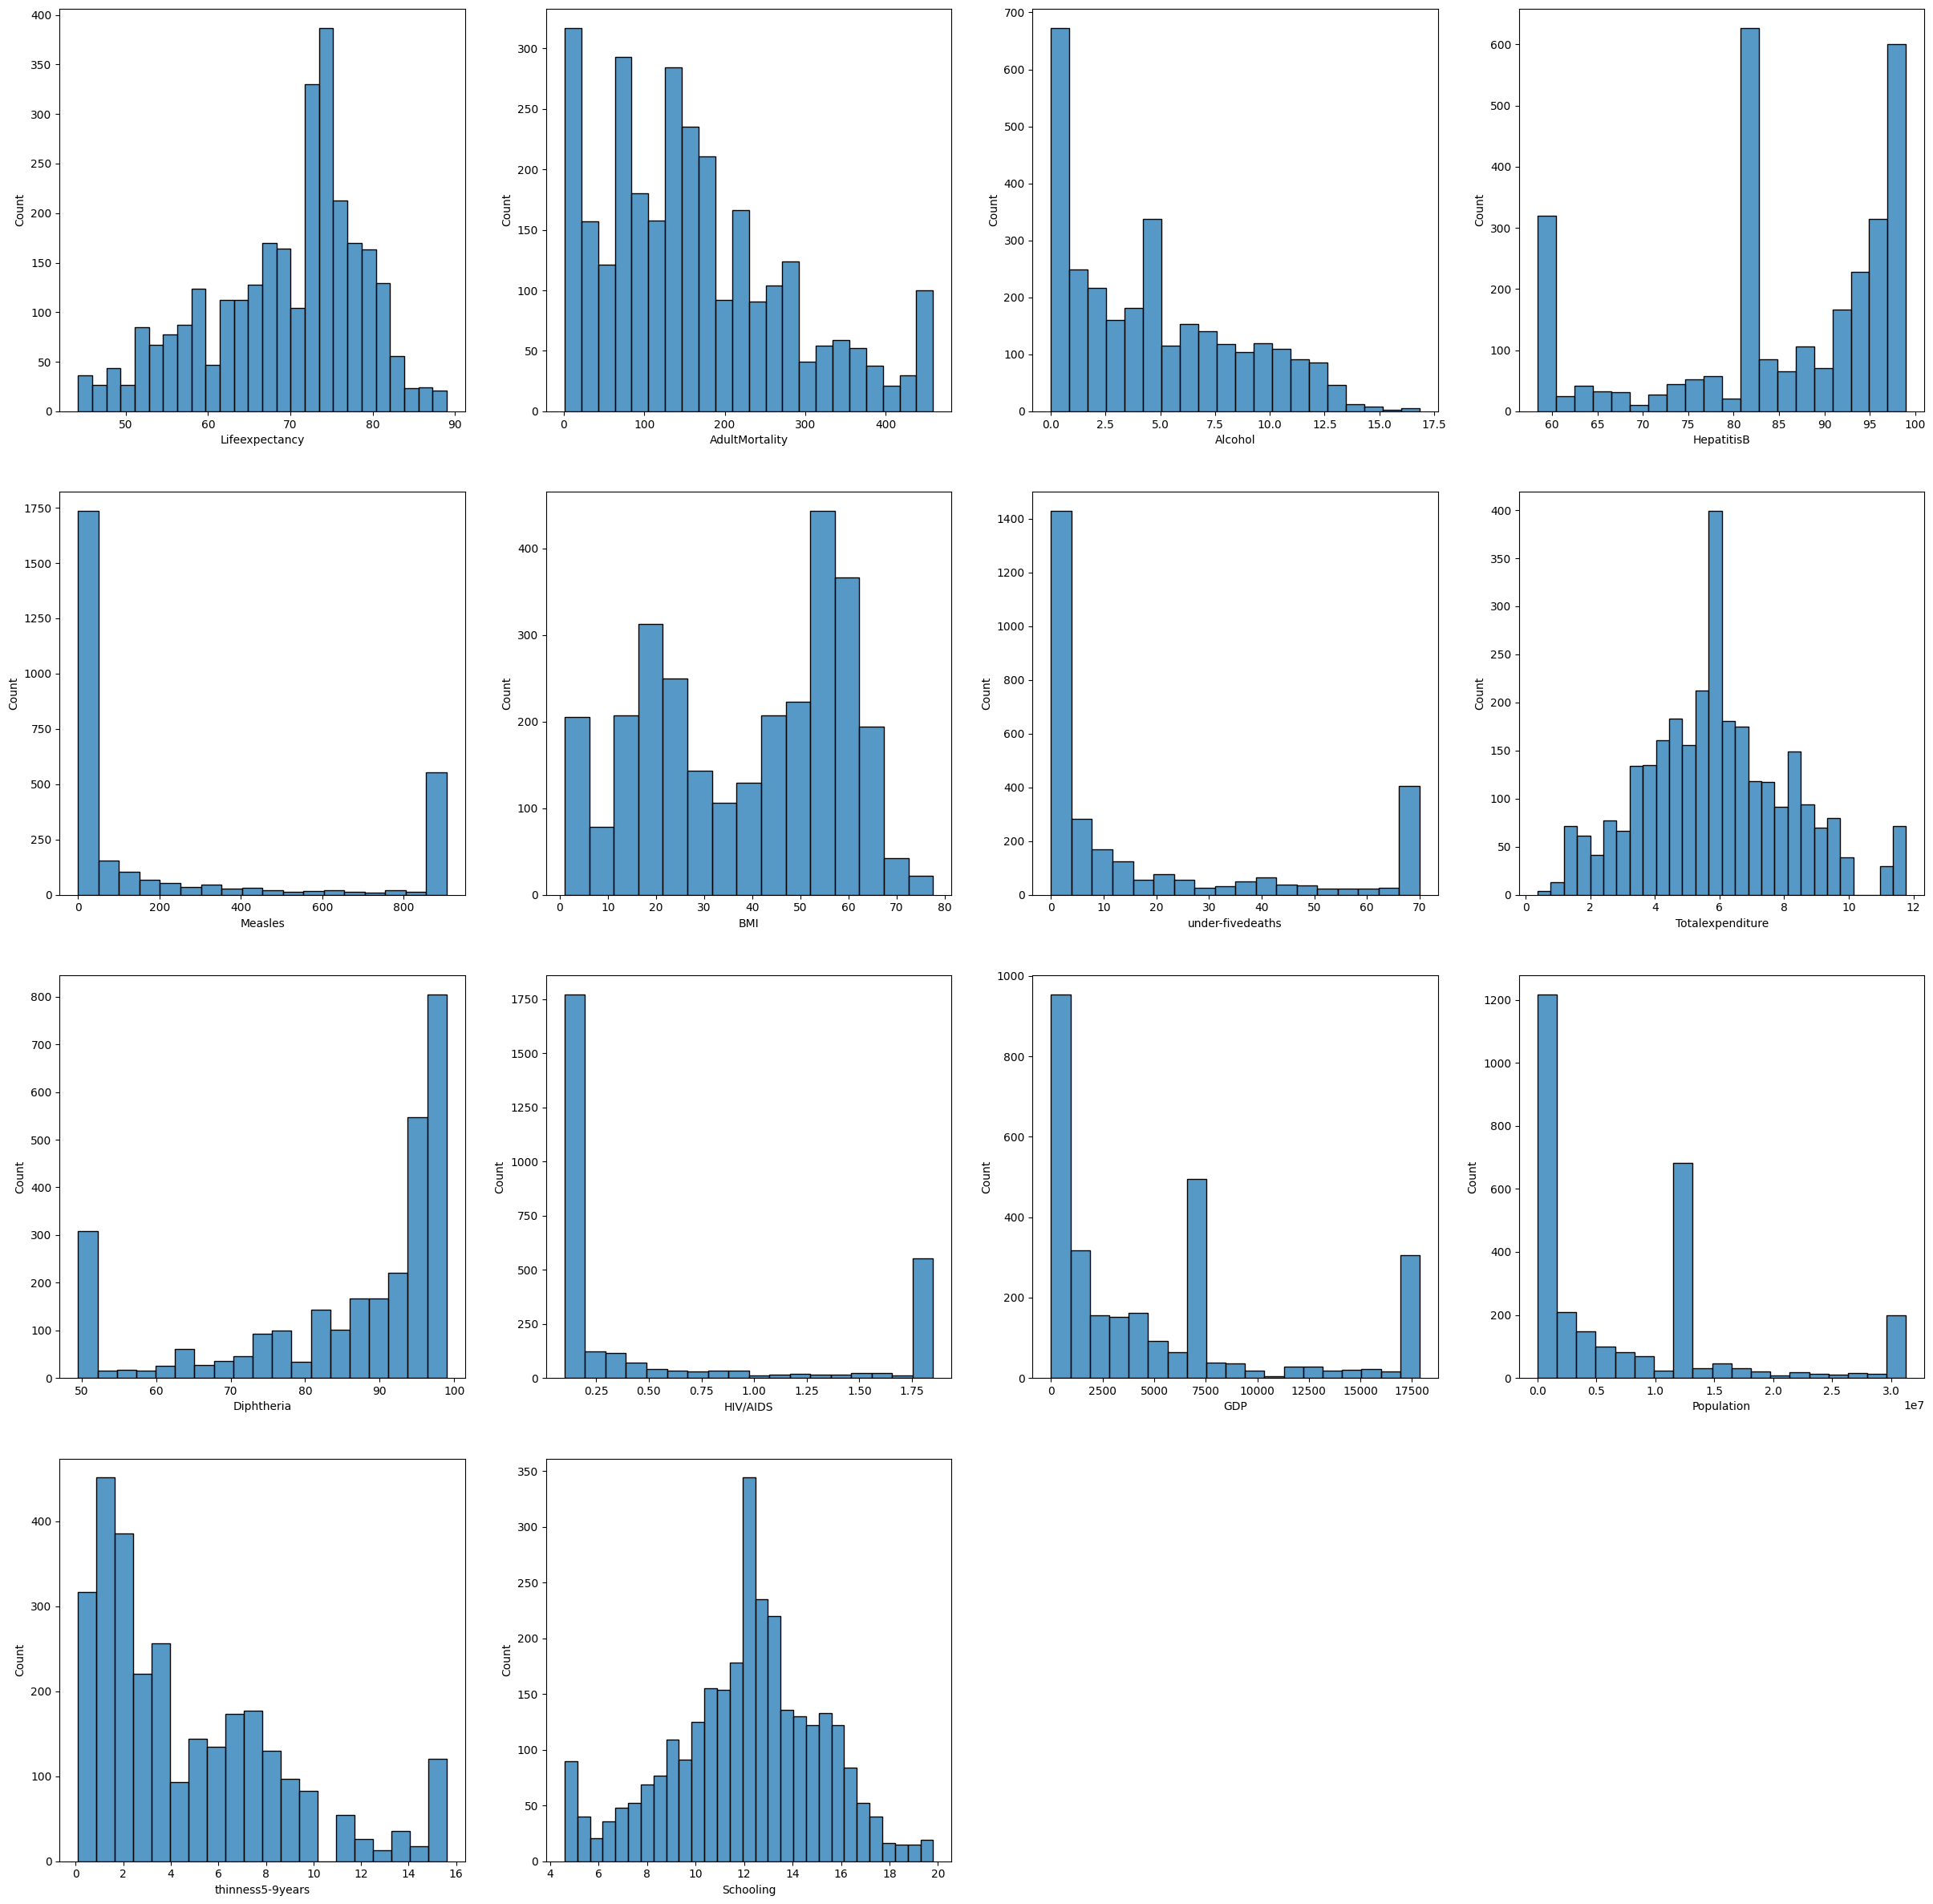

In [41]:
# To see the distribution of data after outlier treatment
fig = plt.figure(figsize=(30,30))
counter = 0

for col in df2.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.histplot(data=df2[col])
    plt.xlabel(col)
    counter = counter + 1

In [42]:
# Encoding Status colum to numerical using replace
df2['Status'].replace({'Developing': 1, 'Developed': 0}, inplace=True)

In [43]:
df2

,Status,Lifeexpectancy,AdultMortality,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness5-9years,Schooling
0,1,65.0,263.0,0.01,65.000000,905.625,19.1,70.0,8.16,65.0,0.10,584.259210,3.128417e+07,15.6,10.1
1,1,59.9,271.0,0.01,62.000000,492.000,18.6,70.0,8.18,62.0,0.10,612.696514,3.275820e+05,15.6,10.0
2,1,59.9,268.0,0.01,64.000000,430.000,18.1,70.0,8.13,64.0,0.10,631.744976,3.128417e+07,15.6,9.9
3,1,59.5,272.0,0.01,67.000000,905.625,17.6,70.0,8.52,67.0,0.10,669.959000,3.696958e+06,15.6,9.8
4,1,59.2,275.0,0.01,68.000000,905.625,17.2,70.0,7.87,68.0,0.10,63.537231,2.978599e+06,15.6,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1,44.3,459.0,4.36,68.000000,31.000,27.1,42.0,7.13,65.0,1.85,454.366654,1.277751e+07,9.4,9.2
2934,1,44.5,459.0,4.06,58.402105,905.625,26.7,41.0,6.52,68.0,1.85,453.351155,1.263390e+07,9.9,9.5
2935,1,44.8,73.0,4.43,73.000000,304.000,26.3,40.0,6.53,71.0,1.85,57.348340,1.255250e+05,1.3,10.0
2936,1,45.3,459.0,1.72,76.000000,529.000,25.9,39.0,6.16,75.0,1.85,548.587312,1.236616e+07,1.7,9.8


In [44]:
X=df2.drop('Lifeexpectancy',axis=1)
y=df2[['Lifeexpectancy']]

In [45]:
X

,Status,AdultMortality,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness5-9years,Schooling
0,1,263.0,0.01,65.000000,905.625,19.1,70.0,8.16,65.0,0.10,584.259210,3.128417e+07,15.6,10.1
1,1,271.0,0.01,62.000000,492.000,18.6,70.0,8.18,62.0,0.10,612.696514,3.275820e+05,15.6,10.0
2,1,268.0,0.01,64.000000,430.000,18.1,70.0,8.13,64.0,0.10,631.744976,3.128417e+07,15.6,9.9
3,1,272.0,0.01,67.000000,905.625,17.6,70.0,8.52,67.0,0.10,669.959000,3.696958e+06,15.6,9.8
4,1,275.0,0.01,68.000000,905.625,17.2,70.0,7.87,68.0,0.10,63.537231,2.978599e+06,15.6,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1,459.0,4.36,68.000000,31.000,27.1,42.0,7.13,65.0,1.85,454.366654,1.277751e+07,9.4,9.2
2934,1,459.0,4.06,58.402105,905.625,26.7,41.0,6.52,68.0,1.85,453.351155,1.263390e+07,9.9,9.5
2935,1,73.0,4.43,73.000000,304.000,26.3,40.0,6.53,71.0,1.85,57.348340,1.255250e+05,1.3,10.0
2936,1,459.0,1.72,76.000000,529.000,25.9,39.0,6.16,75.0,1.85,548.587312,1.236616e+07,1.7,9.8


In [46]:
y

,Lifeexpectancy
0,65.0
1,59.9
2,59.9
3,59.5
4,59.2
...,...
2933,44.3
2934,44.5
2935,44.8
2936,45.3


In [47]:
# Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Convert the result back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [48]:
X_scaled

,Status,AdultMortality,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness5-9years,Schooling
0,0.460348,0.871086,-1.176836,-1.537612,1.884396,-0.964155,2.061485,0.988621,-1.282015,-0.630709,-0.813774,2.649184,2.734294,-0.628647
1,0.460348,0.940142,-1.176836,-1.772450,0.721332,-0.989348,2.061485,0.997369,-1.472166,-0.630709,-0.808705,-0.824808,2.734294,-0.660924
2,0.460348,0.914246,-1.176836,-1.615891,0.546996,-1.014541,2.061485,0.975498,-1.345399,-0.630709,-0.805310,2.649184,2.734294,-0.693201
3,0.460348,0.948774,-1.176836,-1.381053,1.884396,-1.039734,2.061485,1.146095,-1.155248,-0.630709,-0.798499,-0.446692,2.734294,-0.725478
4,0.460348,0.974671,-1.176836,-1.302774,1.884396,-1.059889,2.061485,0.861767,-1.091864,-0.630709,-0.906585,-0.527307,2.734294,-0.822309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,0.460348,2.562974,-0.064996,-1.302774,-0.574943,-0.561068,0.950871,0.538069,-1.282015,1.890947,-0.836925,0.572341,1.174035,-0.919141
2924,0.460348,2.562974,-0.141674,-2.054090,1.884396,-0.581222,0.911206,0.271238,-1.091864,1.890947,-0.837106,0.556224,1.299862,-0.822309
2925,0.460348,-0.769010,-0.047104,-0.911377,0.192699,-0.601376,0.871542,0.275612,-0.901714,1.890947,-0.907688,-0.847483,-0.864367,-0.660924
2926,0.460348,2.562974,-0.739767,-0.676539,0.825372,-0.621531,0.831877,0.113763,-0.648179,1.890947,-0.820132,0.526179,-0.763705,-0.725478


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model_name= []
RMSE = []
R2_score = []

models = [
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    LinearRegression(),
    XGBRegressor(),
    ExtraTreeRegressor()
]

for model in models :
    model.fit(X_train , y_train)
    
    prediction = model.predict(X_test)
    
    model_name.append(model.__class__.__name__)
    
    RMSE.append(str(mean_squared_error( prediction , y_test, squared=False )))
    R2_score.append(str(r2_score( y_test , prediction ) * 100 ) + " %")

In [51]:
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)

,RMSE,R2_Score
Model-Name,,
RandomForestRegressor,1.7803205117543803,96.3270490019245 %
XGBRegressor,1.9078439332547235,95.78202079804818 %
GradientBoostingRegressor,2.29607813070379,93.89069134066841 %
DecisionTreeRegressor,2.5057272281674083,92.72410659756515 %
ExtraTreeRegressor,3.083233863660115,88.98380340394156 %
LinearRegression,3.6510042257373723,84.55302603856977 %
